# Building An Image Classifier with CNN

# Initial Setup


In [101]:
# General Imports
import tensorflow as tf
from tensorflow import keras

# Imports for preprocessing
import sklearn
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Imports for analysis and performance
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Imports for better Python computing and visualizations
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# Retrieve path to the Natural Images Dataset

In [102]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("prasunroy/natural-images")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/prasunroy/natural-images/versions/1


# Retrieve Dataset Labels

In [103]:
# Hardcode labels from dataset in alphabetical order
img_labels = np.array(["airplane", "car", "cat", "dog", "flower", "fruit", "motorbike", "person"])
print(img_labels)

['airplane' 'car' 'cat' 'dog' 'flower' 'fruit' 'motorbike' 'person']


# Load Dataset


In [105]:
# Imports for operating system interactions and image reading/manipulation
import os
import cv2

x_data =[] # Image Data
y_data = [] # Image Label

# Loop through image folders and load data
for label in img_labels:
    new_path = path + '/data/natural_images/{0}/'.format(label)
    folder_data = os.listdir(new_path)
    for image_path in folder_data:
        image = cv2.imread(new_path+image_path)
        # Resize image to 32x32 pixels for better efficiency
        image_resized = cv2.resize(image, (32,32))
        x_data.append(np.array(image_resized))
        y_data.append(label)
        pass
    pass

# Convert data lists to Numpy arrays for better efficiency
x_data = np.array(x_data)
y_data = np.array(y_data)
print('The shape of X is: ', x_data.shape)
print('The shape of Y is: ', y_data.shape)

# Standardize Image Data
x_data = x_data.astype('float32')/255

The shape of X is:  (6899, 32, 32, 3)
The shape of Y is:  (6899,)


In [106]:
# Convert y data into categorical data
y_encoded = LabelEncoder().fit_transform(y_data)
y_categorical = to_categorical(y_encoded)

In [107]:
# Create an Index Array of image data
indx_arr = np.arange(x_data.shape[0])
np.random.seed(42) # Set Random Seed
np.random.shuffle(indx_arr) # Shuffle Indices

# Apply shuffle to the image data and labels
X = x_data[indx_arr]
Y = y_categorical[indx_arr]

# Split into Training and Testing Sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33)

# Build a Neural Network Model (CNN)

In [108]:
# Initalize Sequential Model
cnn = tf.keras.models.Sequential()

# Convolution and Pooling Layers 1
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))

# Convolution and Pooling Layers 2
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))

# Convolution and Pooling Layers 3
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))

# Dropout Layer 1
cnn.add(tf.keras.layers.Dropout(rate=0.25))

# Flatten Layer 1
cnn.add(tf.keras.layers.Flatten())

# Fully Connected Layer 1
cnn.add(tf.keras.layers.Dense(512, activation='relu'))

# Dropout Layer 2
cnn.add(tf.keras.layers.Dropout(rate=0.5))

# Fully Connected Layer 2
cnn.add(tf.keras.layers.Dense(8, activation='softmax'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Compile the Model

In [109]:
cnn.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the Model

In [110]:
history = cnn.fit(X_train, Y_train, epochs=20, validation_split=0.2)

Epoch 1/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 9s 64ms/step - accuracy: 0.3170 - loss: 1.7795 - val_accuracy: 0.6562 - val_loss: 0.9623
Epoch 2/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 11s 73ms/step - accuracy: 0.6547 - loss: 0.9347 - val_accuracy: 0.7686 - val_loss: 0.6208
Epoch 3/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 7s 48ms/step - accuracy: 0.7321 - loss: 0.7346 - val_accuracy: 0.8054 - val_loss: 0.5676
Epoch 4/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 7s 63ms/step - accuracy: 0.7832 - loss: 0.5667 - val_accuracy: 0.8303 - val_loss: 0.4443
Epoch 5/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - accuracy: 0.8281 - loss: 0.4267 - val_accuracy: 0.8605 - val_loss: 0.3835
Epoch 6/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 12s 59ms/step - accuracy: 0.8658 - loss: 0.3632 - val_accuracy: 0.8119 - val_loss: 0.5366
Epoch 7/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - accuracy: 0.8444 - loss: 0.3830 - val_accuracy: 0.8454 - val_loss: 0.4492
Epoch 8/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - accuracy: 0.8902 - loss: 0.3099 - val_a

# Plot Accuracy and Loss Values

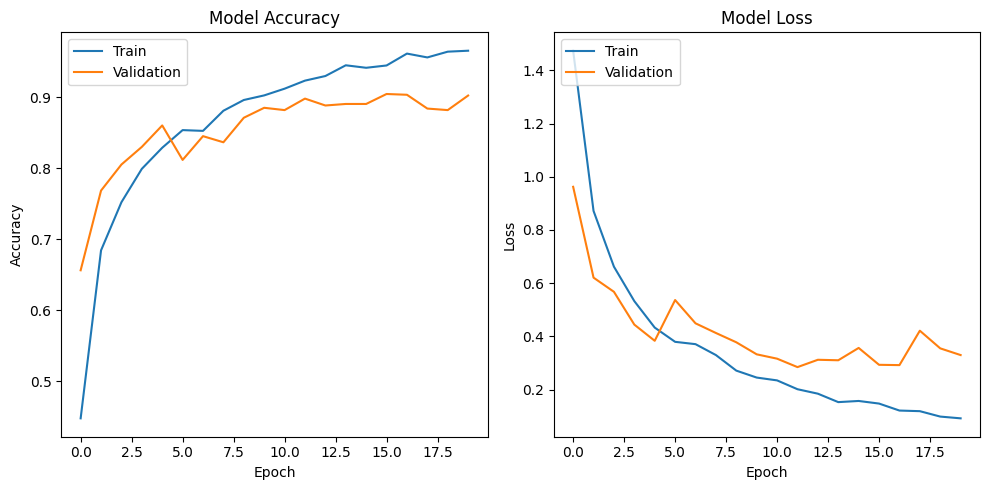

In [111]:
plt.figure(figsize=(10, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)  # Accuracy subplot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)  # Loss subplot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()  # Better spacing
plt.show()

# Evaluate Performance with the Test Dataset

In [112]:
# Use trained CNN model to make predictions on test dataset
Y_pred = np.argmax(cnn.predict(X_test), axis=1)

# Apply logic above but to the actual labels dataset
Y_test = np.argmax(Y_test, axis = 1)

# Print predicted and actual labels
print(Y_pred)
print(Y_test)

# Calculate accuracy of the model's predictions
accuracy_score(Y_pred,Y_test)

72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
[5 0 6 ... 6 3 5]
[5 0 6 ... 6 3 5]


0.9007465963987703

In [113]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       241
           1       0.93      0.95      0.94       328
           2       0.76      0.81      0.78       283
           3       0.61      0.62      0.62       210
           4       0.98      0.82      0.89       262
           5       0.99      0.99      0.99       341
           6       0.96      0.96      0.96       270
           7       0.98      0.99      0.99       342

    accuracy                           0.90      2277
   macro avg       0.89      0.89      0.89      2277
weighted avg       0.90      0.90      0.90      2277



In [114]:
# Display first 20 predicted labels
Y_pred[:20]

array([5, 0, 6, 7, 6, 0, 2, 7, 3, 2, 5, 6, 2, 6, 7, 2, 7, 2, 7, 1])

In [115]:
# Display first 20 true labels
Y_test[:20]

array([5, 0, 6, 7, 6, 0, 2, 7, 2, 2, 5, 6, 2, 6, 7, 2, 7, 2, 7, 1])

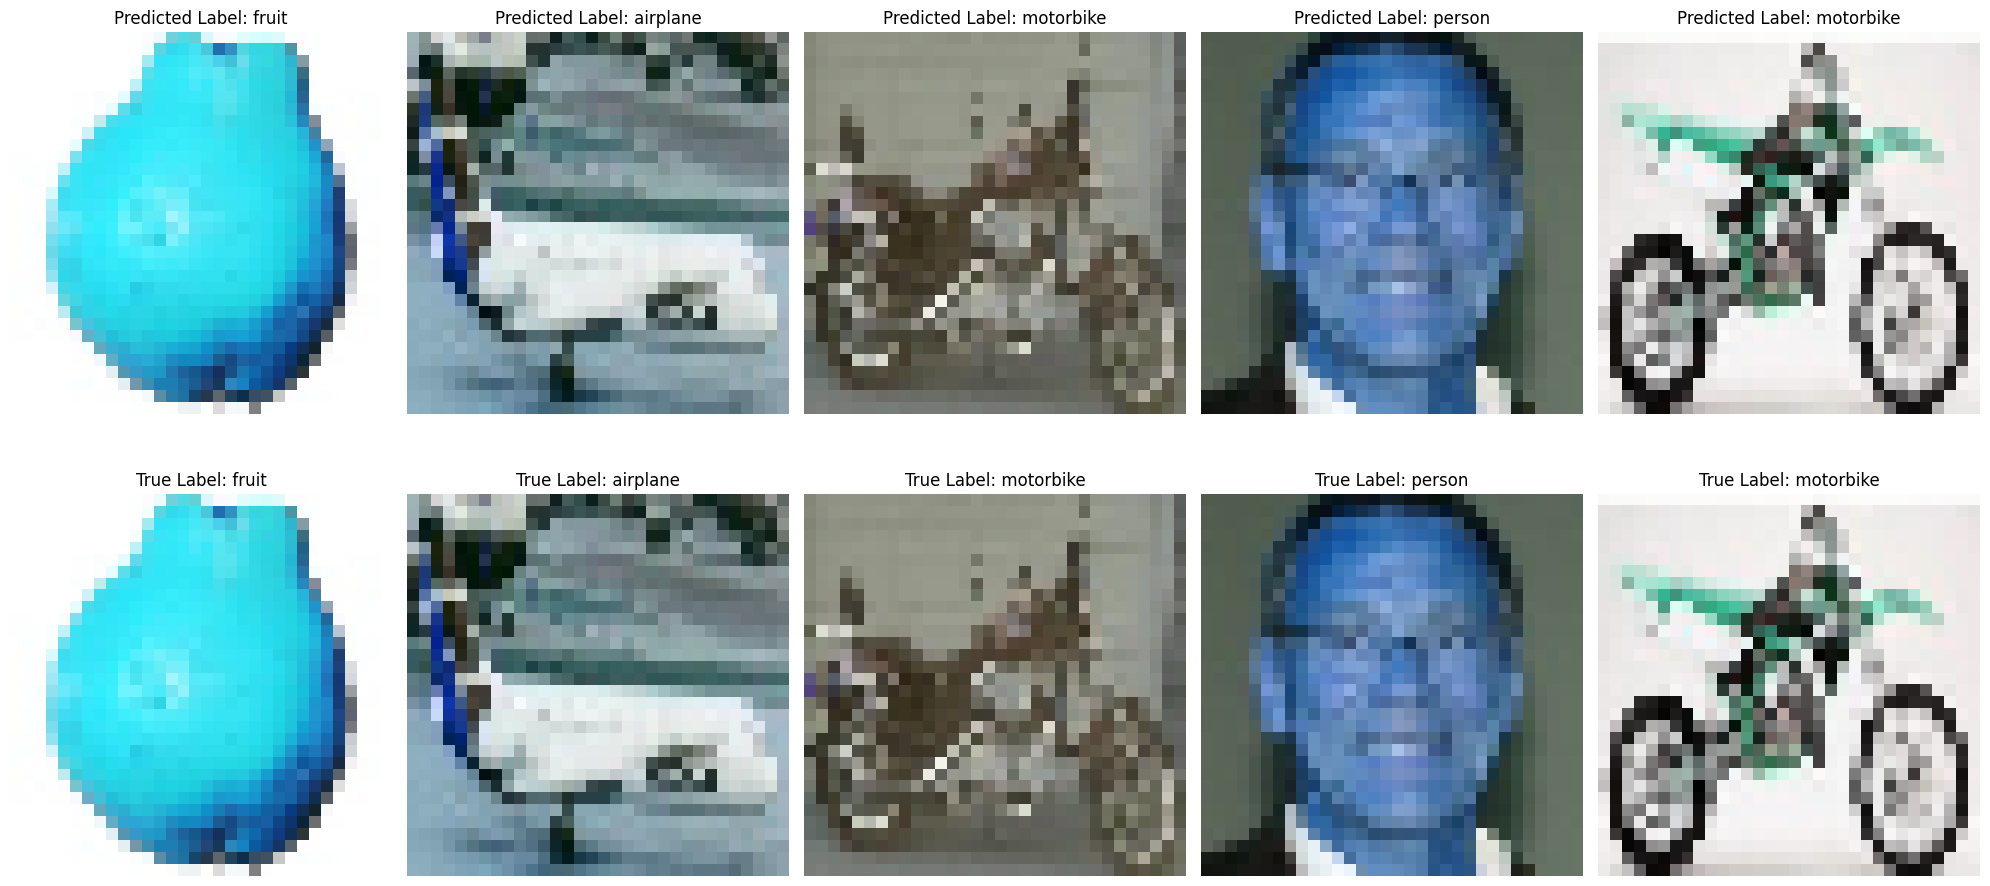

In [116]:
import matplotlib.pyplot as plt

num_images = 5
fig, axes = plt.subplots(2, num_images, figsize=(20, 10))

for i in range(num_images):
    # Display the image
    axes[0, i].imshow(X_test[i])
    axes[0, i].set_title(f"Predicted Label: {img_labels[Y_pred[i]]}") # Predicted Labels
    axes[0, i].axis('off')  # Turn off axis

    axes[1, i].imshow(X_test[i])
    axes[1, i].set_title(f"True Label: {img_labels[Y_test[i]]}") # True Labels
    axes[1, i].axis('off')  # Turn off axis


plt.tight_layout()
plt.show()